# Data Import and Initial Exploration

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("combined_data.csv", index_col=[0, 1])
df

Inflation  Population           GDP      Export  \
Country Code Year                                                     
ABW          1980         NaN     59909.0           NaN         NaN   
             1981         NaN     60563.0           NaN         NaN   
             1982         NaN     61276.0           NaN         NaN   
             1983         NaN     62228.0           NaN         NaN   
             1984         NaN     62901.0           NaN         NaN   
...                       ...         ...           ...         ...   
ZWE          2017    0.893962  14812482.0  5.107466e+10  107.151887   
             2018   10.618866  15034452.0  3.415607e+10  124.909506   
             2019  255.304991  15271368.0  2.571741e+10  131.425343   
             2020  557.201817  15526888.0  2.686794e+10  135.325610   
             2021   98.546105  15797210.0  2.724052e+10  185.806800   

                       Import  
Country Code Year              
ABW          1980         NaN  
             1981         NaN  
             1982         NaN  
             1983         NaN  
             1984         NaN  
...                       ...  
ZWE          2017   83.660837  
             2018  105.579357  
             2019   79.585840  
             2020   82.633621  
             2021  118.756526  

[7686 rows x 5 columns]

In [3]:
df = df[['Inflation', 'Population', 'GDP', 'Export', 'Import']]
df

Inflation  Population           GDP      Export  \
Country Code Year                                                     
ABW          1980         NaN     59909.0           NaN         NaN   
             1981         NaN     60563.0           NaN         NaN   
             1982         NaN     61276.0           NaN         NaN   
             1983         NaN     62228.0           NaN         NaN   
             1984         NaN     62901.0           NaN         NaN   
...                       ...         ...           ...         ...   
ZWE          2017    0.893962  14812482.0  5.107466e+10  107.151887   
             2018   10.618866  15034452.0  3.415607e+10  124.909506   
             2019  255.304991  15271368.0  2.571741e+10  131.425343   
             2020  557.201817  15526888.0  2.686794e+10  135.325610   
             2021   98.546105  15797210.0  2.724052e+10  185.806800   

                       Import  
Country Code Year              
ABW          1980         NaN  
             1981         NaN  
             1982         NaN  
             1983         NaN  
             1984         NaN  
...                       ...  
ZWE          2017   83.660837  
             2018  105.579357  
             2019   79.585840  
             2020   82.633621  
             2021  118.756526  

[7686 rows x 5 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7686 entries, ('ABW', 1980) to ('ZWE', 2021)
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Inflation   6524 non-null   float64
 1   Population  7676 non-null   float64
 2   GDP         7317 non-null   float64
 3   Export      6718 non-null   float64
 4   Import      6718 non-null   float64
dtypes: float64(5)
memory usage: 329.7+ KB


In [5]:
df.describe()

,Inflation,Population,GDP,Export,Import
count,6524.000000,7.676000e+03,7.317000e+03,6718.000000,6718.000000
mean,27.307048,3.303254e+07,2.463399e+11,80.067353,60.338428
std,373.801095,1.257859e+08,1.174733e+12,126.718969,46.627973
min,-17.640424,7.649000e+03,2.101742e+07,0.116088,0.497513
25%,1.995485,1.426135e+06,2.727850e+09,24.089049,20.454348
50%,4.539524,6.160314e+06,1.307478e+10,60.117266,47.942225
75%,9.842515,2.009290e+07,7.884466e+10,104.985027,99.781272
max,23773.131774,1.414204e+09,2.368117e+13,2991.592051,480.734506


In [6]:
df.shape

(7686, 5)

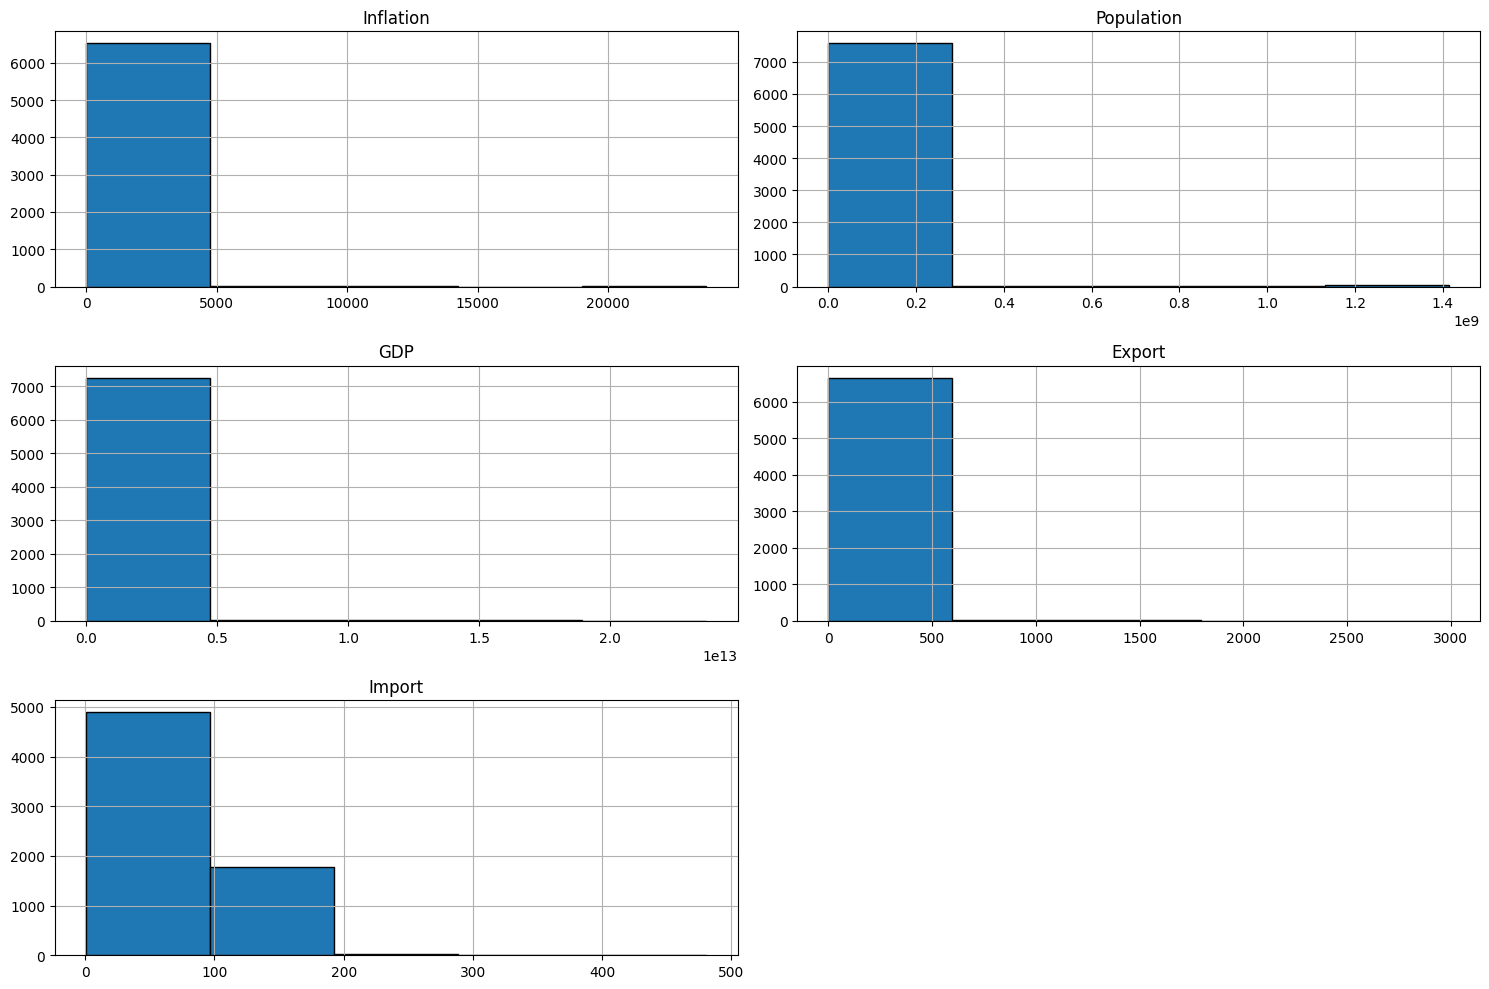

In [7]:
df.hist(figsize=(15, 10), bins=5, edgecolor='black')
plt.tight_layout()
plt.savefig("df_hist.png", dpi=300, bbox_inches="tight")
plt.show()

In [8]:
country_data = df.loc ['ECU']

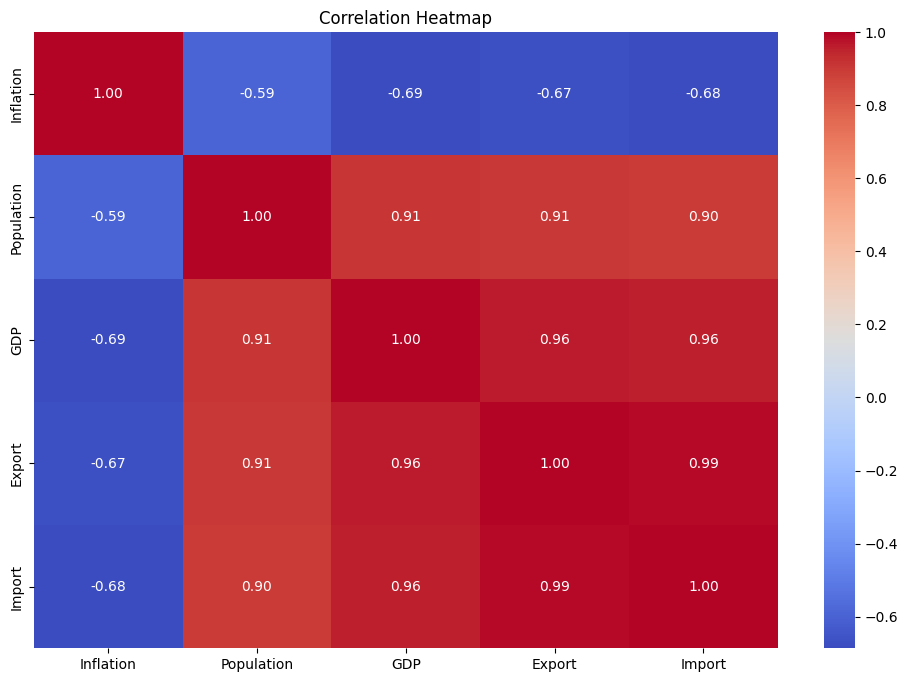

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(country_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


# Preprocessing

# Data scaling

In [10]:
df

Inflation  Population           GDP      Export  \
Country Code Year                                                     
ABW          1980         NaN     59909.0           NaN         NaN   
             1981         NaN     60563.0           NaN         NaN   
             1982         NaN     61276.0           NaN         NaN   
             1983         NaN     62228.0           NaN         NaN   
             1984         NaN     62901.0           NaN         NaN   
...                       ...         ...           ...         ...   
ZWE          2017    0.893962  14812482.0  5.107466e+10  107.151887   
             2018   10.618866  15034452.0  3.415607e+10  124.909506   
             2019  255.304991  15271368.0  2.571741e+10  131.425343   
             2020  557.201817  15526888.0  2.686794e+10  135.325610   
             2021   98.546105  15797210.0  2.724052e+10  185.806800   

                       Import  
Country Code Year              
ABW          1980         NaN  
             1981         NaN  
             1982         NaN  
             1983         NaN  
             1984         NaN  
...                       ...  
ZWE          2017   83.660837  
             2018  105.579357  
             2019   79.585840  
             2020   82.633621  
             2021  118.756526  

[7686 rows x 5 columns]

In [11]:
from sklearn.preprocessing import StandardScaler
columns = df.columns
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

In [12]:
df

Inflation  Population       GDP    Export    Import
Country Code Year                                                     
ABW          1980        NaN   -0.262150       NaN       NaN       NaN
             1981        NaN   -0.262145       NaN       NaN       NaN
             1982        NaN   -0.262139       NaN       NaN       NaN
             1983        NaN   -0.262131       NaN       NaN       NaN
             1984        NaN   -0.262126       NaN       NaN       NaN
...                      ...         ...       ...       ...       ...
ZWE          2017  -0.070666   -0.144859 -0.166232  0.213753  0.500218
             2018  -0.044648   -0.143094 -0.180635  0.353897  0.970325
             2019   0.609991   -0.141211 -0.187819  0.405321  0.412818
             2020   1.417694   -0.139179 -0.186840  0.436102  0.478186
             2021   0.190595   -0.137030 -0.186523  0.834503  1.252948

[7686 rows x 5 columns]

In [13]:
df.describe()

,Inflation,Population,GDP,Export,Import
count,6.524000e+03,7.676000e+03,7317.000000,6.718000e+03,6.718000e+03
mean,-6.534728e-18,2.221603e-17,0.000000,-3.701845e-17,-4.230680e-17
std,1.000077e+00,1.000065e+00,1.000068,1.000074e+00,1.000074e+00
min,-1.202536e-01,-2.625654e-01,-0.209695,-6.309806e-01,-1.283465e+00
25%,-6.771918e-02,-2.512877e-01,-0.207391,-4.417845e-01,-8.554317e-01
50%,-6.091279e-02,-2.136485e-01,-0.198582,-1.574474e-01,-2.658731e-01
75%,-4.672504e-02,-1.028770e-01,-0.142591,1.966519e-01,8.459681e-01
max,6.353016e+01,1.098105e+01,19.950436,2.297794e+01,9.016634e+00


# Handeling missing values

In [14]:
df.isnull().sum()

Inflation     1162
Population      10
GDP            369
Export         968
Import         968
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

Inflation     0
Population    0
GDP           0
Export        0
Import        0
dtype: int64

In [17]:
df.count()

Inflation     5968
Population    5968
GDP           5968
Export        5968
Import        5968
dtype: int64

In [18]:
"""
df_filtered = df.dropna(thresh=3, axis=0)  

print("Original rows:", df.shape[0])
print("Filtered rows:", df_filtered.shape[0])
df = df_filtered
"""

'\ndf_filtered = df.dropna(thresh=3, axis=0)  \n\nprint("Original rows:", df.shape[0])\nprint("Filtered rows:", df_filtered.shape[0])\ndf = df_filtered\n'

In [19]:
df.to_csv('df_preprocessed.csv')

# Split Data into Train and Test Sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'GDP'), df['GDP'], test_size = 0.2, shuffle = True, random_state = 42)

In [21]:
print("number of training samples", X_train.shape[0])
print("number of test samples", X_test.shape[0])

number of training samples 4774
number of test samples 1194


# Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1, include_bias =False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model1 = LinearRegression()
model1.fit(X_train_poly, y_train)



LinearRegression()

# Evaluation with test data for Regression model

In [23]:
from sklearn.metrics import r2_score
y_pred = model1.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print("Accuracy:", r2)

Accuracy: 0.149176723086216


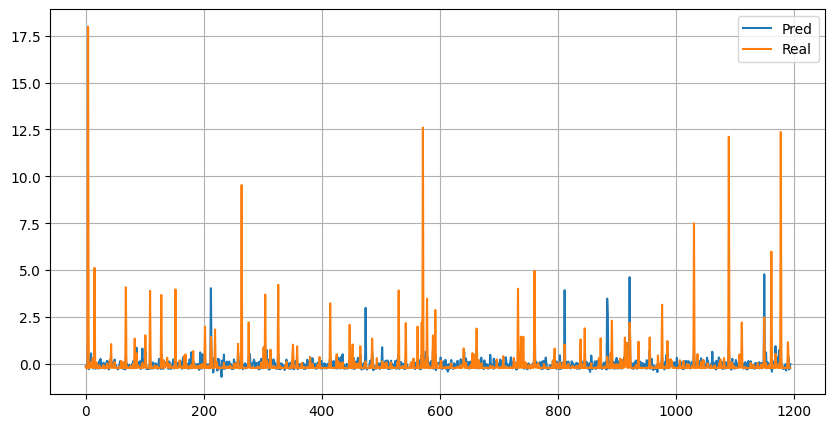

In [24]:
import matplotlib.pyplot as plt
y_test_reset = y_test.reset_index(drop=True)
plt.figure(figsize = (10,5))
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test_reset, label = 'Real')
plt.grid()
plt.legend()
plt.show()

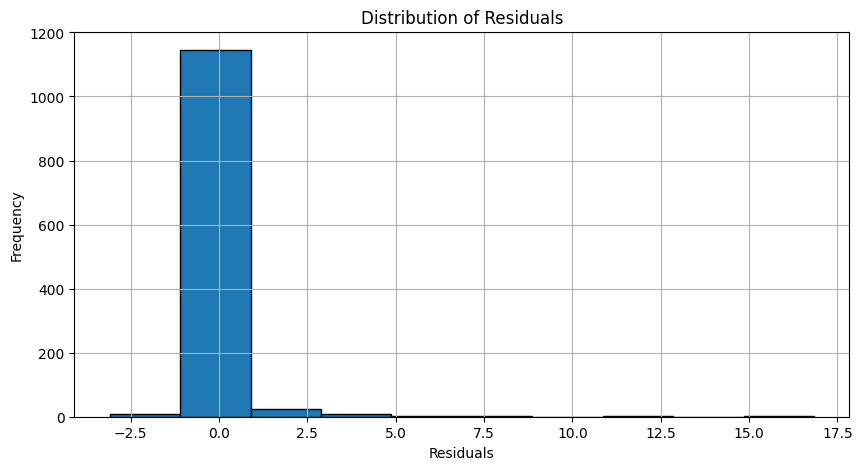

In [25]:
residuals = y_test_reset - y_pred
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=10, edgecolor='k')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()


# Ridge Model

In [26]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.05, 0, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000]}


ridge = Ridge()

scorer = make_scorer(r2_score)

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

model2 = Ridge(alpha=best_alpha)
model2.fit(X_train, y_train)

Best alpha: 200


Ridge(alpha=200)

# Evaluation with test data for Ridge model

In [27]:
from sklearn.metrics import r2_score
y_pred = model2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Accuracy:", r2)

Accuracy: 0.14891105876844335


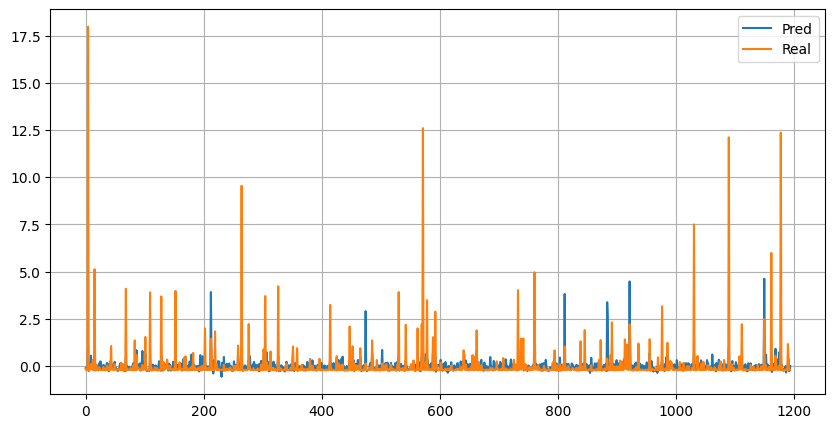

In [28]:
import matplotlib.pyplot as plt
y_test_reset = y_test.reset_index(drop=True)
plt.figure(figsize = (10,5))
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test_reset, label = 'Real')
plt.grid()
plt.legend()
plt.show()

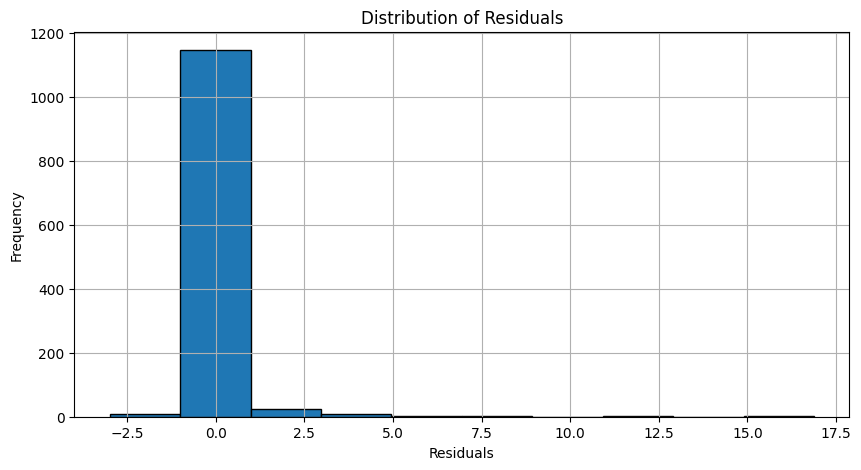

In [29]:
residuals = y_test_reset - y_pred
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=10, edgecolor='k')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()


# ElasticNet model

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.01, 0.05, 0, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000],
    'l1_ratio': [0.01, 0.05, 0, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000]
}

elastic_net = ElasticNet(random_state=42)

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

model3 = grid_search.best_estimator_

Best Parameters: {'alpha': 0.05, 'l1_ratio': 0}


# Evaluation with test data for ElasticNet

In [31]:
y_pred = model3.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Accuracy:", r2)

Accuracy: 0.14879637598182394


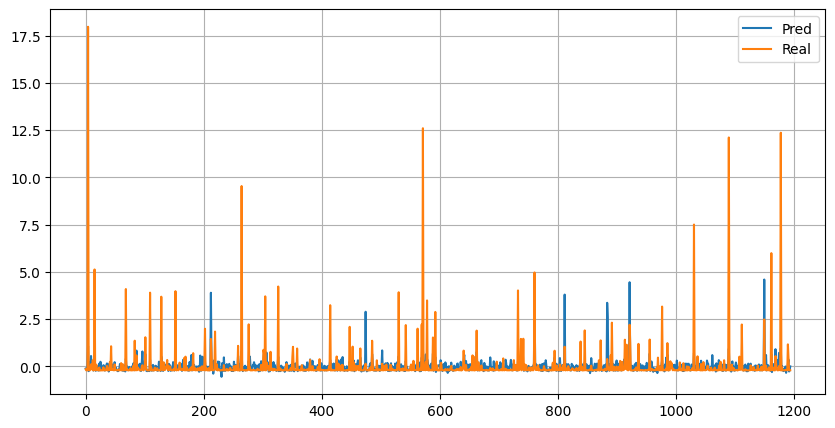

In [32]:
import matplotlib.pyplot as plt
y_test_reset = y_test.reset_index(drop=True)
plt.figure(figsize = (10,5))
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test_reset, label = 'Real')
plt.grid()
plt.legend()
plt.show()

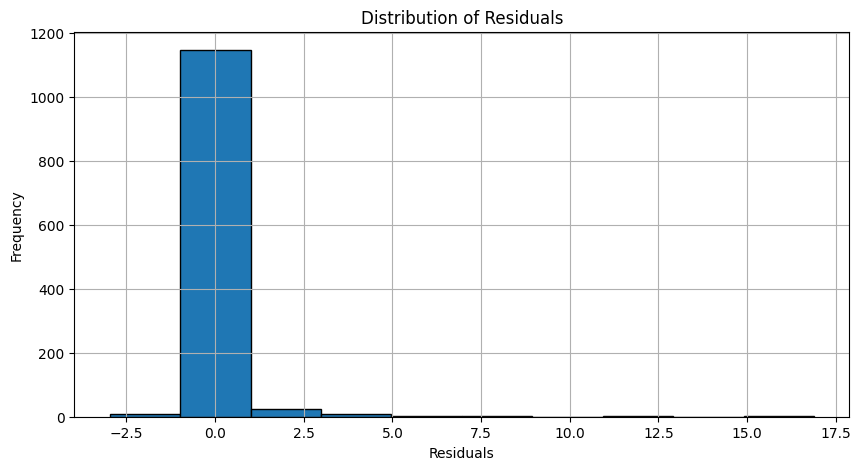

In [33]:
residuals = y_test_reset - y_pred
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=10, edgecolor='k')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()


# Collecting the coefficients

In [34]:
coefficients_regression = model1.coef_
coefficients_regression

array([-0.00293302,  0.41013798, -0.07864008,  0.178465  ])

In [35]:
coefficients_Ridge = model2.coef_
coefficients_Ridge

array([-0.00322468,  0.39746069, -0.0667639 ,  0.16472114])

In [36]:
coefficients_ElasticNet = model3.coef_
coefficients_ElasticNet

array([-0.00327083,  0.39509443, -0.06477388,  0.16235221])

# Coefficients for each Country

In [37]:
country_data = df.loc['ECU']

In [38]:
country_data

,Inflation,Population,GDP,Export,Import
Year,,,,,
1980,-0.041196,-0.197703,-0.194490,-0.525086,-1.069538
1981,-0.035474,-0.195946,-0.191145,-0.526351,-1.070255
1982,-0.029490,-0.194162,-0.192746,-0.531690,-1.077950
1983,0.056481,-0.192340,-0.195111,-0.530816,-1.145879
1984,0.010468,-0.190477,-0.195315,-0.519075,-1.133031
1985,0.001837,-0.188598,-0.195114,-0.506834,-1.118050
1986,-0.011442,-0.186730,-0.196676,-0.538403,-1.113704
1987,0.005878,-0.184876,-0.197841,-0.548895,-1.069717
1988,0.082695,-0.183035,-0.198602,-0.537503,-1.123342


In [39]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1980 to 2021
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Inflation   42 non-null     float64
 1   Population  42 non-null     float64
 2   GDP         42 non-null     float64
 3   Export      42 non-null     float64
 4   Import      42 non-null     float64
dtypes: float64(5)
memory usage: 2.0 KB


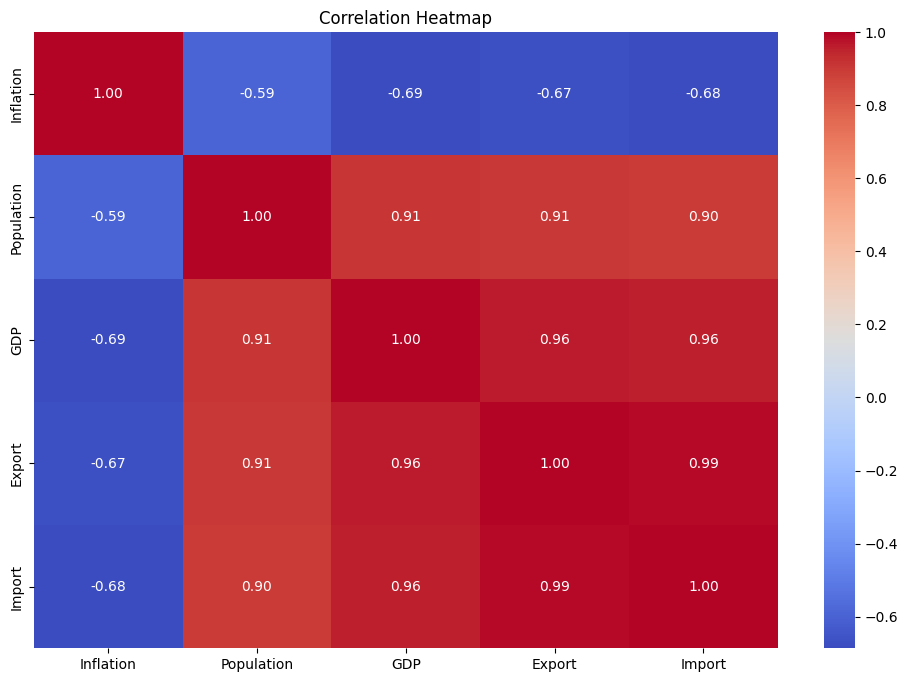

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(country_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


In [41]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(country_data.drop(columns = 'GDP'), country_data['GDP'], test_size = 0.1, shuffle = True, random_state = 42)

In [42]:
print("number of training samples", X_train1.shape[0])
print("number of test samples", X_test1.shape[0])

number of training samples 37
number of test samples 5


# Regression Model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1, include_bias =False)
X_train_poly = poly.fit_transform(X_train1)
X_test_poly = poly.transform(X_test1)

model1 = LinearRegression()
model1.fit(X_train_poly, y_train1)



LinearRegression()

In [44]:
from sklearn.metrics import r2_score
y_pred = model1.predict(X_test_poly)
r2 = r2_score(y_test1, y_pred)
print("Accuracy:", r2)

Accuracy: 0.5406523734366648


In [45]:
model1.coef_

array([-0.0519713 ,  0.30998039,  0.06542172, -0.00418492])

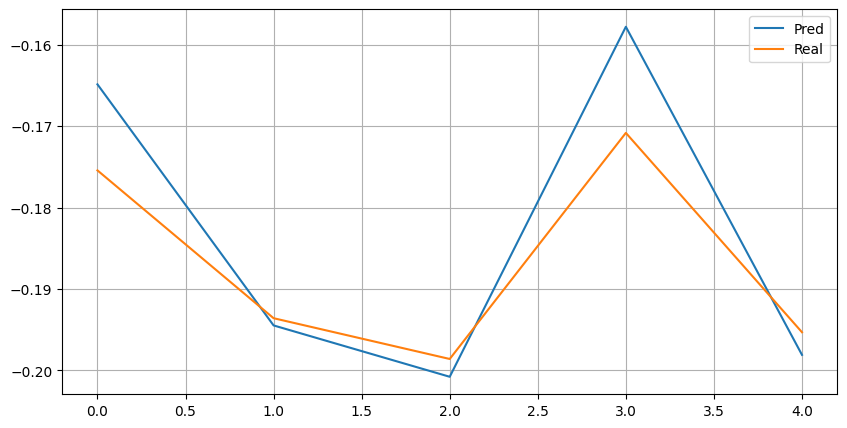

In [46]:
import matplotlib.pyplot as plt
y_test_reset = y_test1.reset_index(drop=True)
plt.figure(figsize = (10,5))
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test_reset, label = 'Real')
plt.grid()
plt.legend()
plt.show()

# Ridge model

In [47]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000]}


ridge = Ridge()

scorer = make_scorer(r2_score)

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train1, y_train1)


best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

model2 = Ridge(alpha=best_alpha)
model2.fit(X_train1, y_train1)

Best alpha: 0.01


Ridge(alpha=0.01)

In [48]:
from sklearn.metrics import r2_score
y_pred = model2.predict(X_test1)
r2 = r2_score(y_test1, y_pred)
print("Accuracy:", r2)

Accuracy: 0.6772317390714866


In [49]:
model2.coef_

array([-0.04173752,  0.08289834,  0.07086209, -0.00086583])

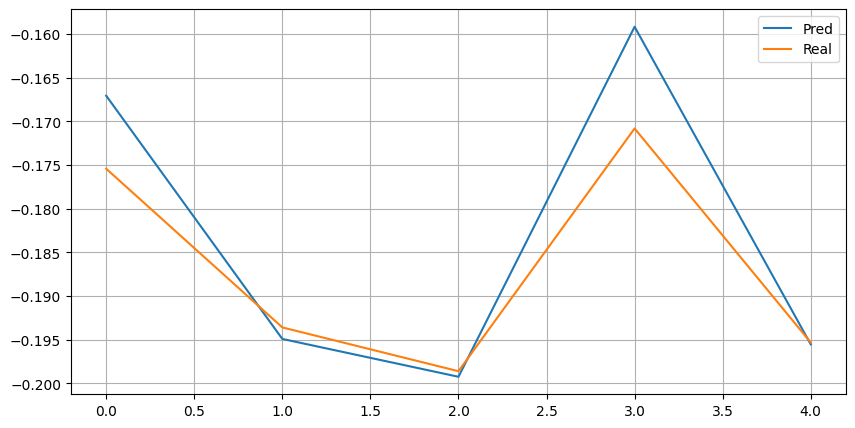

In [50]:
import matplotlib.pyplot as plt
y_test_reset = y_test1.reset_index(drop=True)
plt.figure(figsize = (10,5))
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test_reset, label = 'Real')
plt.grid()
plt.legend()
plt.show()

# ElasticNet model

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer, r2_score

param_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000],
    'l1_ratio': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000]  
}

elastic_net = ElasticNet(random_state=42)

scorer = make_scorer(r2_score)


grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train1, y_train1)


best_params = grid_search.best_params_
best_alpha = best_params['alpha']
best_l1_ratio = best_params['l1_ratio']
print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

model3 = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)
model3.fit(X_train1, y_train1)

Best alpha: 0.01
Best l1_ratio: 0.01


ElasticNet(alpha=0.01, l1_ratio=0.01, random_state=42)

In [52]:
y_pred = model3.predict(X_test1)
r2 = r2_score(y_test1, y_pred)
print("Accuracy:", r2)

Accuracy: 0.8640506065193994


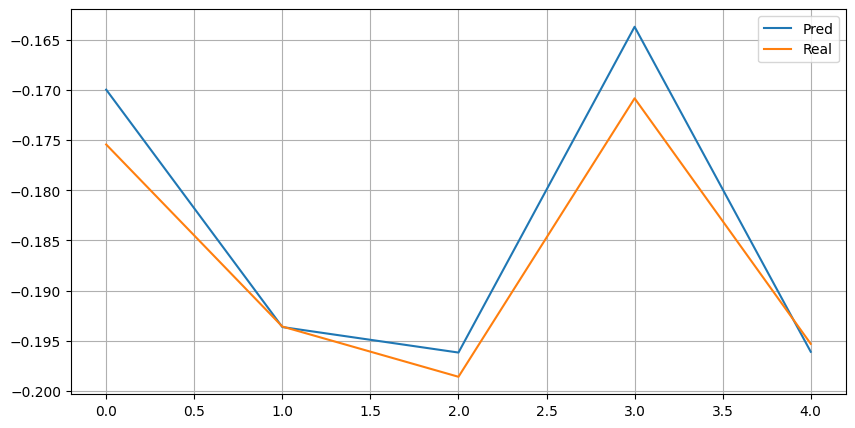

In [53]:
import matplotlib.pyplot as plt
y_test_reset = y_test1.reset_index(drop=True)
plt.figure(figsize = (10,5))
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test_reset, label = 'Real')
plt.grid()
plt.legend()
plt.show()

# Coefficients of Model

In [54]:
coefficients_regression = model1.coef_
coefficients_regression

array([-0.0519713 ,  0.30998039,  0.06542172, -0.00418492])

In [55]:
coefficients_Ridge = model2.coef_
coefficients_Ridge

array([-0.04173752,  0.08289834,  0.07086209, -0.00086583])

In [56]:
coefficients_ElasticNet = model3.coef_
coefficients_ElasticNet

array([-0.        ,  0.        ,  0.0168561 ,  0.02398412])

# Collecting Coefficients of first model (regression)

In [57]:
countries = df.index.get_level_values('Country Code').unique()
len(countries)

183

In [58]:
results = []

countries = df.index.get_level_values('Country Code').unique()

for country in countries:
    country_data = df.loc[country]
    
    if country_data.shape[0] < 35:
        print(f"Skipping {country}: fewer than 35 samples.")
        continue
    
    X = country_data[['Population', 'Inflation', 'Import', 'Export']]
    y = country_data['GDP']
    
    export_gdp_corr = country_data[['Export', 'GDP']].corr().iloc[0, 1]
    
    poly = PolynomialFeatures(degree=1, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    model1 = LinearRegression()
    model1.fit(X_poly, y)
    
    coefficients = model1.coef_
    score = model1.score(X_poly, y)
    
    results.append({
        'Country': country,
        'Population_Coeff': coefficients[0],
        'Inflation_Coeff': coefficients[1],
        'Import_Coeff': coefficients[2],
        'Export_Coeff': coefficients[3],
        'Score': score,
        'Export_GDP_Correlation': export_gdp_corr
    })

coefficients_df = pd.DataFrame(results)

coefficients_df.to_csv('linear_regression_coefficients_all_countries.csv', index=False)
print("Coefficients with scores saved for all countries.")


Skipping ABW: fewer than 35 samples.
Skipping AFG: fewer than 35 samples.
Skipping AGO: fewer than 35 samples.
Skipping ALB: fewer than 35 samples.
Skipping ARE: fewer than 35 samples.
Skipping ARM: fewer than 35 samples.
Skipping ATG: fewer than 35 samples.
Skipping AUS: fewer than 35 samples.
Skipping AUT: fewer than 35 samples.
Skipping AZE: fewer than 35 samples.
Skipping BEL: fewer than 35 samples.
Skipping BEN: fewer than 35 samples.
Skipping BGR: fewer than 35 samples.
Skipping BIH: fewer than 35 samples.
Skipping BLR: fewer than 35 samples.
Skipping CAN: fewer than 35 samples.
Skipping COG: fewer than 35 samples.
Skipping COM: fewer than 35 samples.
Skipping CUW: fewer than 35 samples.
Skipping CYM: fewer than 35 samples.
Skipping CYP: fewer than 35 samples.
Skipping CZE: fewer than 35 samples.
Skipping DEU: fewer than 35 samples.
Skipping DJI: fewer than 35 samples.
Skipping DNK: fewer than 35 samples.
Skipping ESP: fewer than 35 samples.
Skipping EST: fewer than 35 samples.
S

# Collecting Coefficients of second model (Ridge)

In [59]:
""" 
results = []

countries = df.index.get_level_values('Country Code').unique()

alpha_values = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000]

for country in countries:
    country_data = df.loc[country]
    
    
    if country_data.shape[0] < 35:
        print(f"Skipping {country}: fewer than 35 samples.")
        continue
    
    X = country_data[['Population', 'Inflation', 'Import', 'Export']]
    y = country_data['GDP']
    export_gdp_corr = country_data[['Export', 'GDP']].corr().iloc[0, 1]
    
    best_alpha = None
    best_r2 = -float('inf')
    best_coefficients = None
    
    for alpha in alpha_values:
        model = Ridge(alpha=alpha)
        model.fit(X, y)
        
        r2 = model.score(X, y)
        
        if r2 > best_r2:
            best_alpha = alpha
            best_r2 = r2
            best_coefficients = model.coef_
    
    if best_coefficients is not None:
        results.append({
            'Country': country,
            'Best Alpha': best_alpha,
            'Population_Coeff': best_coefficients[0],
            'Inflation_Coeff': best_coefficients[1],
            'Import_Coeff': best_coefficients[2],
            'Export_Coeff': best_coefficients[3],
            'Score': best_r2,
            'Export_GDP_Correlation': export_gdp_corr
        })

coefficients_df = pd.DataFrame(results)

coefficients_df.to_csv('ridge_regression_coefficients_all_countries.csv', index=False)
print("Ridge coefficients saved for all countries.")
"""

' \nresults = []\n\ncountries = df.index.get_level_values(\'Country Code\').unique()\n\nalpha_values = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000]\n\nfor country in countries:\n    country_data = df.loc[country]\n    \n    \n    if country_data.shape[0] < 35:\n        print(f"Skipping {country}: fewer than 35 samples.")\n        continue\n    \n    X = country_data[[\'Population\', \'Inflation\', \'Import\', \'Export\']]\n    y = country_data[\'GDP\']\n    export_gdp_corr = country_data[[\'Export\', \'GDP\']].corr().iloc[0, 1]\n    \n    best_alpha = None\n    best_r2 = -float(\'inf\')\n    best_coefficients = None\n    \n    for alpha in alpha_values:\n        model = Ridge(alpha=alpha)\n        model.fit(X, y)\n        \n        r2 = model.score(X, y)\n        \n        if r2 > best_r2:\n            best_alpha = alpha\n            best_r2 = r2\n            best_coefficients = model.coef_\n    \n    if best_coefficients is not None:\n        results.append({\n           

In [61]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

results = []

countries = df.index.get_level_values('Country Code').unique()

alpha_values = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000]

for country in countries:
    country_data = df.loc[country]
    
    if country_data.shape[0] < 20:
        print(f"Skipping {country}: fewer than 20 samples.")
        continue
    
    X = country_data[['Population', 'Inflation', 'Import', 'Export']]
    y = country_data['GDP']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    export_gdp_corr = country_data[['Export', 'GDP']].corr().iloc[0, 1]
    
    best_alpha = None
    best_r2_test = -float('inf')
    best_coefficients = None
    
    for alpha in alpha_values:
        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)
        
        r2_test = model.score(X_test, y_test)
        
        if r2_test > best_r2_test:
            best_alpha = alpha
            best_r2_test = r2_test
            best_coefficients = model.coef_
    
    if best_coefficients is not None:
        results.append({
            'Country': country,
            'Best Alpha': best_alpha,
            'Population_Coeff': best_coefficients[0],
            'Inflation_Coeff': best_coefficients[1],
            'Import_Coeff': best_coefficients[2],
            'Export_Coeff': best_coefficients[3],
            'Test_Score': best_r2_test,
            'Export_GDP_Correlation': export_gdp_corr
        })

coefficients_df = pd.DataFrame(results)
coefficients_df.to_csv('ridge_regression_coefficients_all_countries.csv', index=False)
print("Ridge coefficients saved for all countries.")

Skipping AFG: fewer than 20 samples.
Skipping ARE: fewer than 20 samples.
Skipping BIH: fewer than 20 samples.
Skipping COM: fewer than 20 samples.
Skipping CUW: fewer than 20 samples.
Skipping CYM: fewer than 20 samples.
Skipping GIN: fewer than 20 samples.
Skipping IDN: fewer than 20 samples.
Skipping KIR: fewer than 20 samples.
Skipping LBN: fewer than 20 samples.
Skipping MOZ: fewer than 20 samples.
Skipping NAM: fewer than 20 samples.
Skipping NCL: fewer than 20 samples.
Skipping NRU: fewer than 20 samples.
Skipping SDN: fewer than 20 samples.
Skipping SLE: fewer than 20 samples.
Skipping SRB: fewer than 20 samples.
Skipping TJK: fewer than 20 samples.
Skipping UZB: fewer than 20 samples.
Skipping ZWE: fewer than 20 samples.
Ridge coefficients saved for all countries.


# Collecting Coefficients for third model (ElasticNet)

In [62]:
results = []

countries = df.index.get_level_values('Country Code').unique()

param_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000],
    'l1_ratio': [0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 1.0]
}

for country in countries:
    country_data = df.loc[country]
    
    if country_data.shape[0] < 35:
        print(f"Skipping {country}: fewer than 35 samples.")
        continue
    
    X = country_data[['Population', 'Inflation', 'Import', 'Export']]
    y = country_data['GDP']
    export_gdp_corr = country_data[['Export', 'GDP']].corr().iloc[0, 1]
    
    elastic_net = ElasticNet(random_state=42)
    scorer = make_scorer(r2_score)
    grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring=scorer, cv=min(5, X.shape[0]), n_jobs=-1)
    grid_search.fit(X, y)
    
    best_params = grid_search.best_params_
    best_alpha = best_params['alpha']
    best_l1_ratio = best_params['l1_ratio']
    
    model3 = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)
    model3.fit(X, y)
    
    coefficients = model3.coef_
    
    results.append({
        'Country': country,
        'Best Alpha': best_alpha,
        'Best L1 Ratio': best_l1_ratio,
        'Population_Coeff': coefficients[0],
        'Inflation_Coeff': coefficients[1],
        'Import_Coeff': coefficients[2],
        'Export_Coeff': coefficients[3],
        'Score': model3.score(X, y),
        'Export_GDP_Correlation': export_gdp_corr
    })


coefficients_df = pd.DataFrame(results)

coefficients_df.to_csv('elastic_net_coefficients_all_countries.csv', index=False)
print("ElasticNet coefficients saved for all countries.")


Skipping ABW: fewer than 35 samples.
Skipping AFG: fewer than 35 samples.
Skipping AGO: fewer than 35 samples.
Skipping ALB: fewer than 35 samples.
Skipping ARE: fewer than 35 samples.
Skipping ARM: fewer than 35 samples.
Skipping ATG: fewer than 35 samples.
Skipping AUS: fewer than 35 samples.
Skipping AUT: fewer than 35 samples.
Skipping AZE: fewer than 35 samples.
Skipping BEL: fewer than 35 samples.
Skipping BEN: fewer than 35 samples.
Skipping BGR: fewer than 35 samples.
Skipping BIH: fewer than 35 samples.
Skipping BLR: fewer than 35 samples.
Skipping CAN: fewer than 35 samples.
Skipping COG: fewer than 35 samples.
Skipping COM: fewer than 35 samples.
Skipping CUW: fewer than 35 samples.
Skipping CYM: fewer than 35 samples.
Skipping CYP: fewer than 35 samples.
Skipping CZE: fewer than 35 samples.
Skipping DEU: fewer than 35 samples.
Skipping DJI: fewer than 35 samples.
Skipping DNK: fewer than 35 samples.
Skipping ESP: fewer than 35 samples.
Skipping EST: fewer than 35 samples.
S